<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment2/MLAA_Notebook_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6'

In [4]:
df_total = pd.read_csv(file_url)

In [5]:
df_total.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


### 2. Explore Dataset

In [6]:
df = df_total.copy(deep = True)

In [7]:
df.shape

(131337, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

#### Check for duplicates

In [11]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [ID, Target, age_band, gender, car_model, car_segment, age_of_vehicle_years, sched_serv_warr, non_sched_serv_warr, sched_serv_paid, non_sched_serv_paid, total_paid_services, total_services, mth_since_last_serv, annualised_mileage, num_dealers_visited, num_serv_dealer_purchased]
Index: []


There are no duplicate rows on the df

#### Check for null values

In [9]:
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

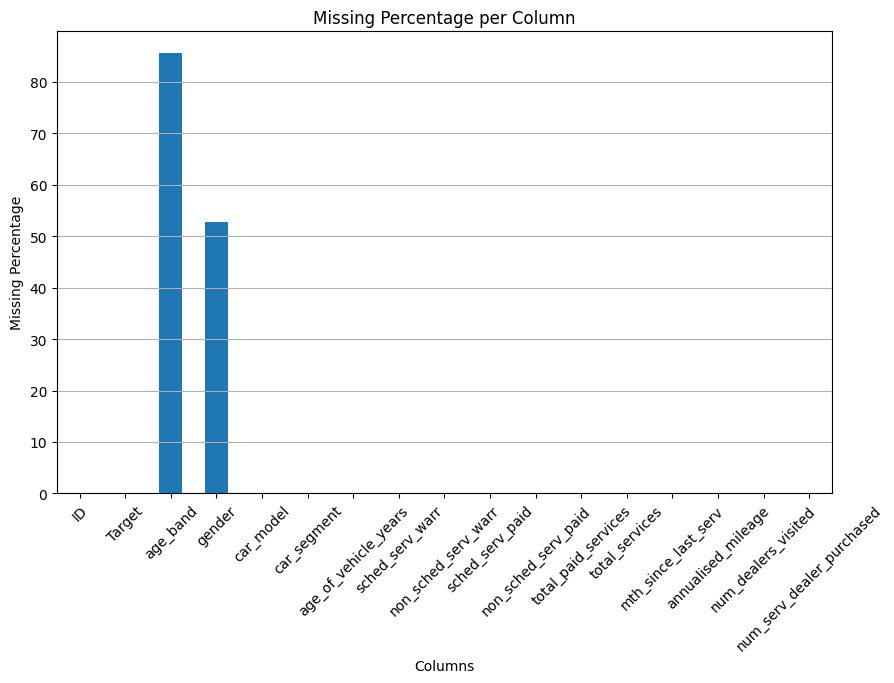

In [10]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing Percentage per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

* Age_band may be better to remove since is almost completly Nan
* Is necessery to know how important is the gender varable to think is drop the variable or try to impute it.

#### Numerical data distribution

<Figure size 1000x600 with 0 Axes>

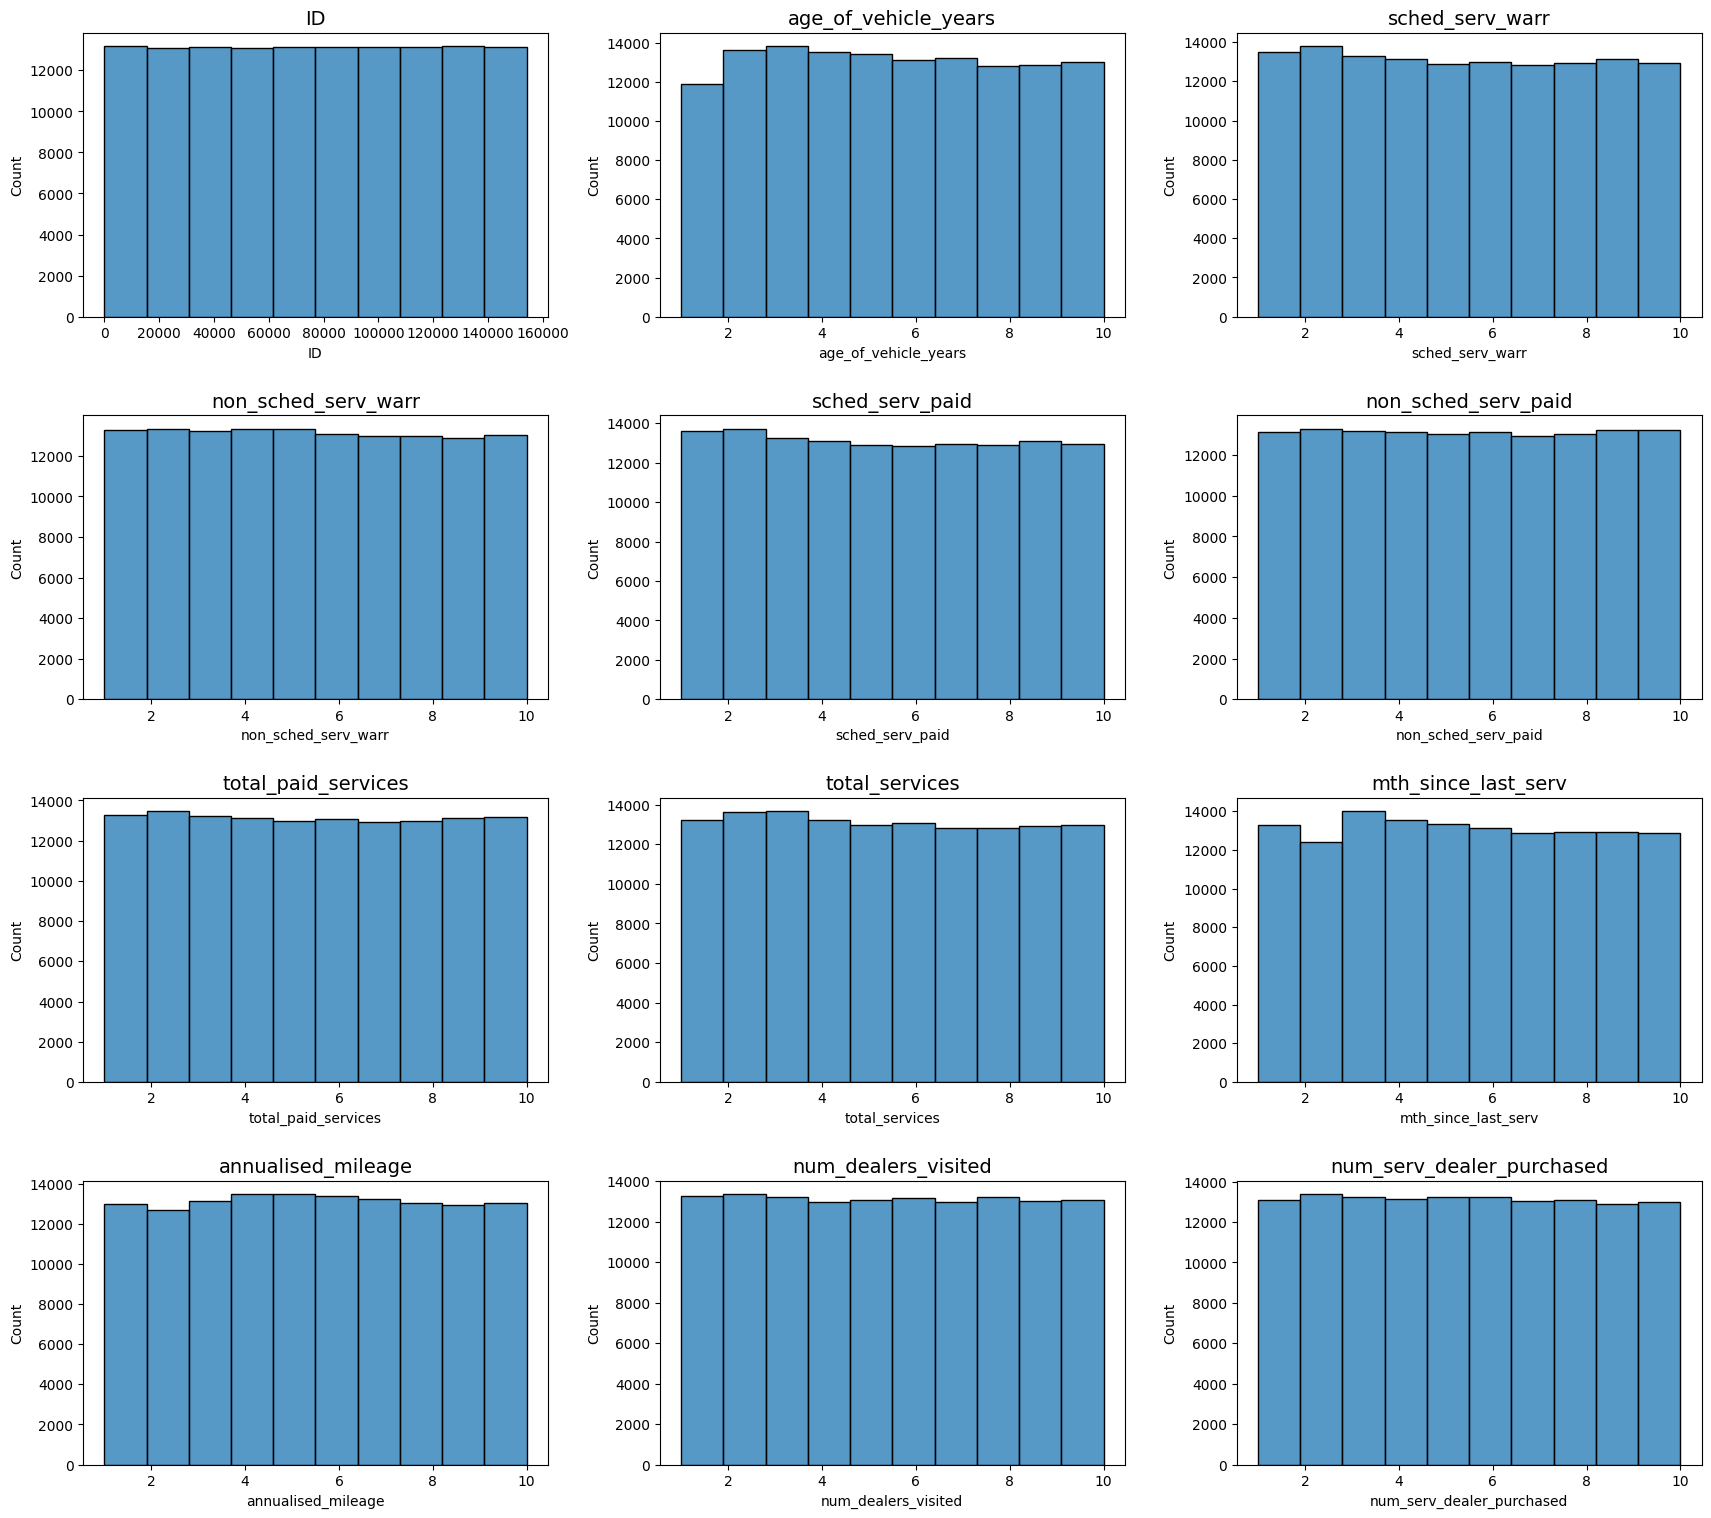

In [30]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop('Target', axis=1)

plt.figure(figsize=(10, 6))

n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df_numeric[col], ax=axs[row, col_idx], kde=False, bins=10)
    axs[row, col_idx].set_title(col, fontsize=14)

for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

due to the numerical representation in deciles, the distribution of all numerical variables can be seen to be very uniform.

#### Categorical variables distribution

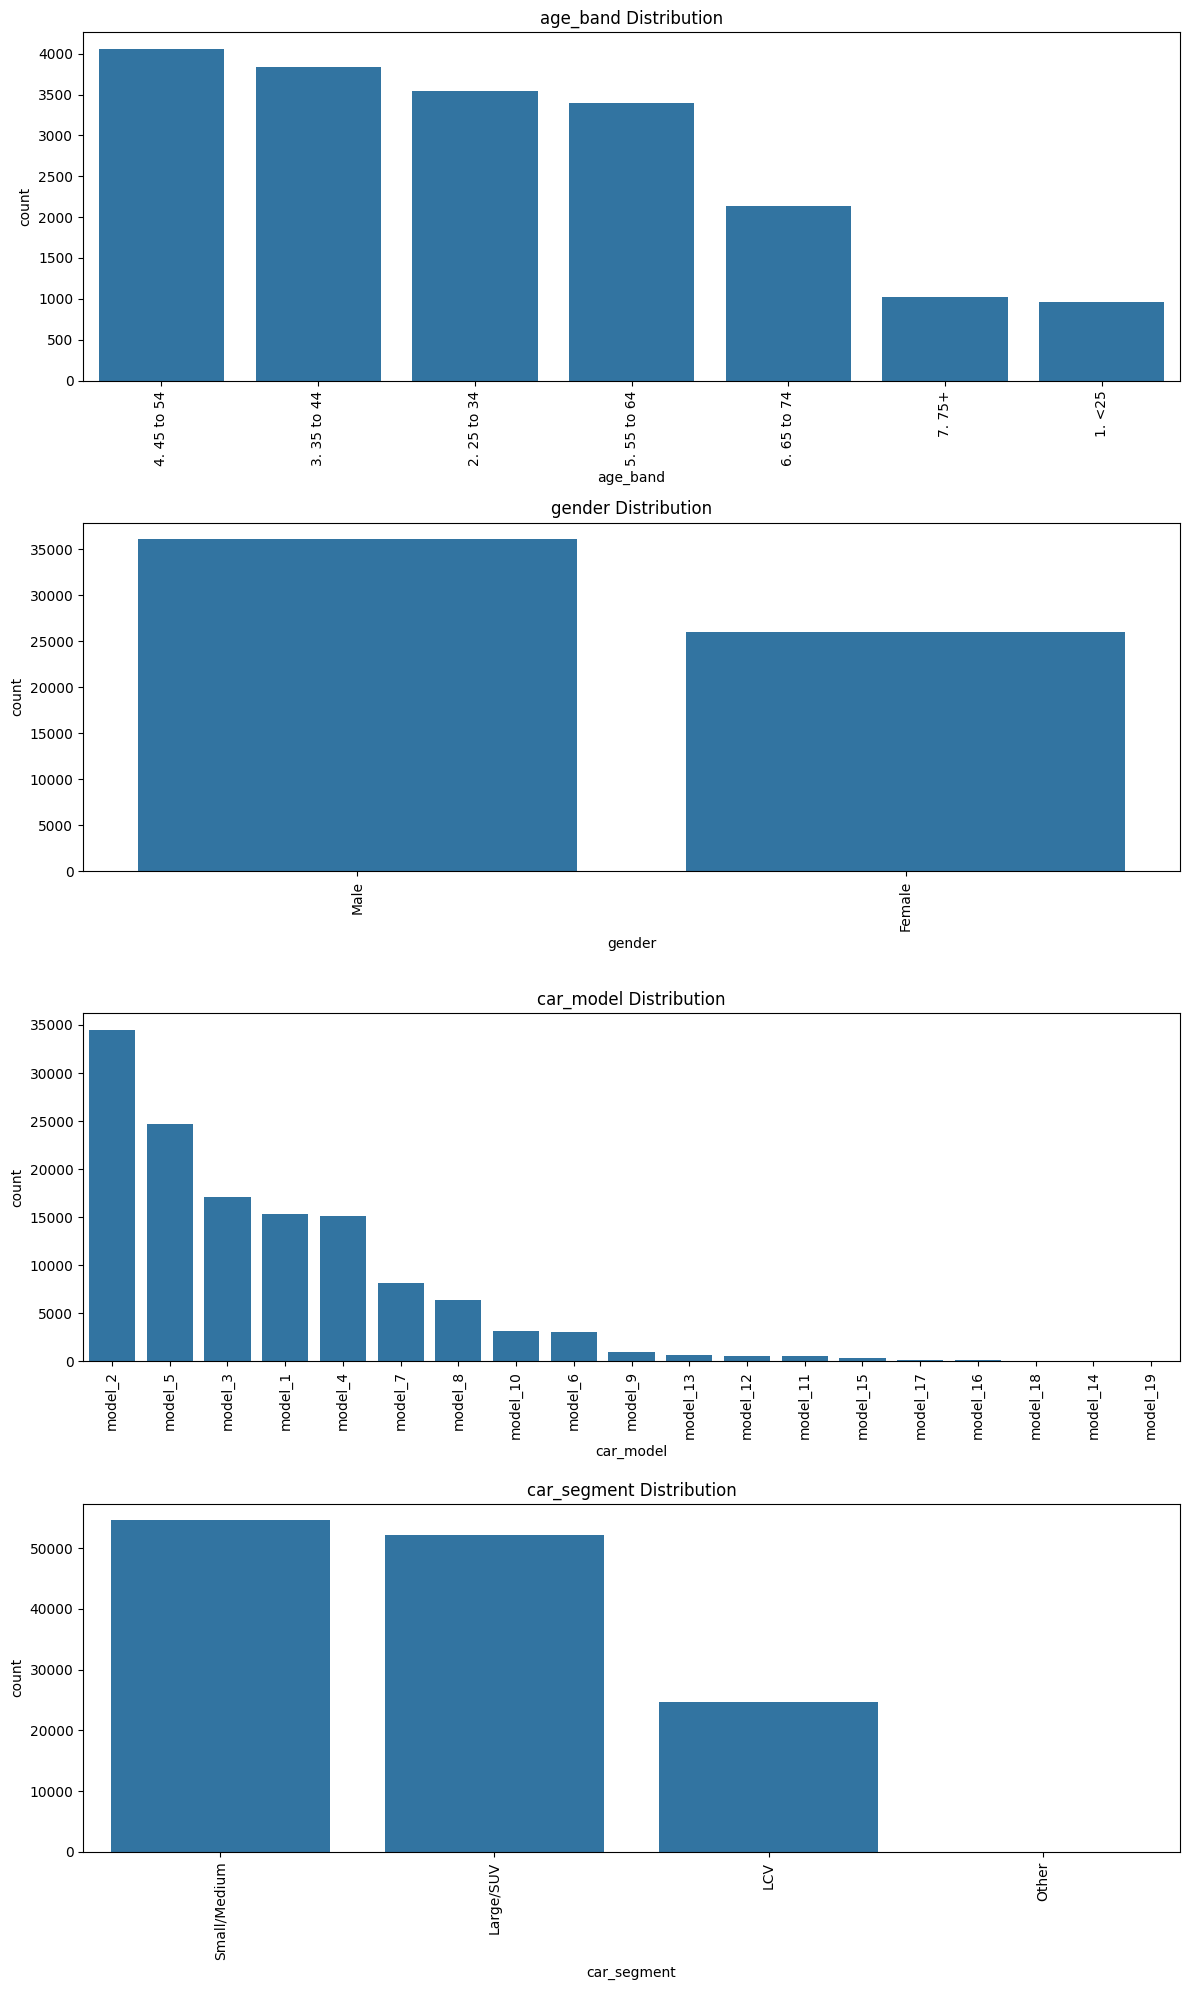

In [31]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

REVISAR QUE HACER CON LAS VARIABLES QUE SON CASI NULAS

#### Correlation heatmap

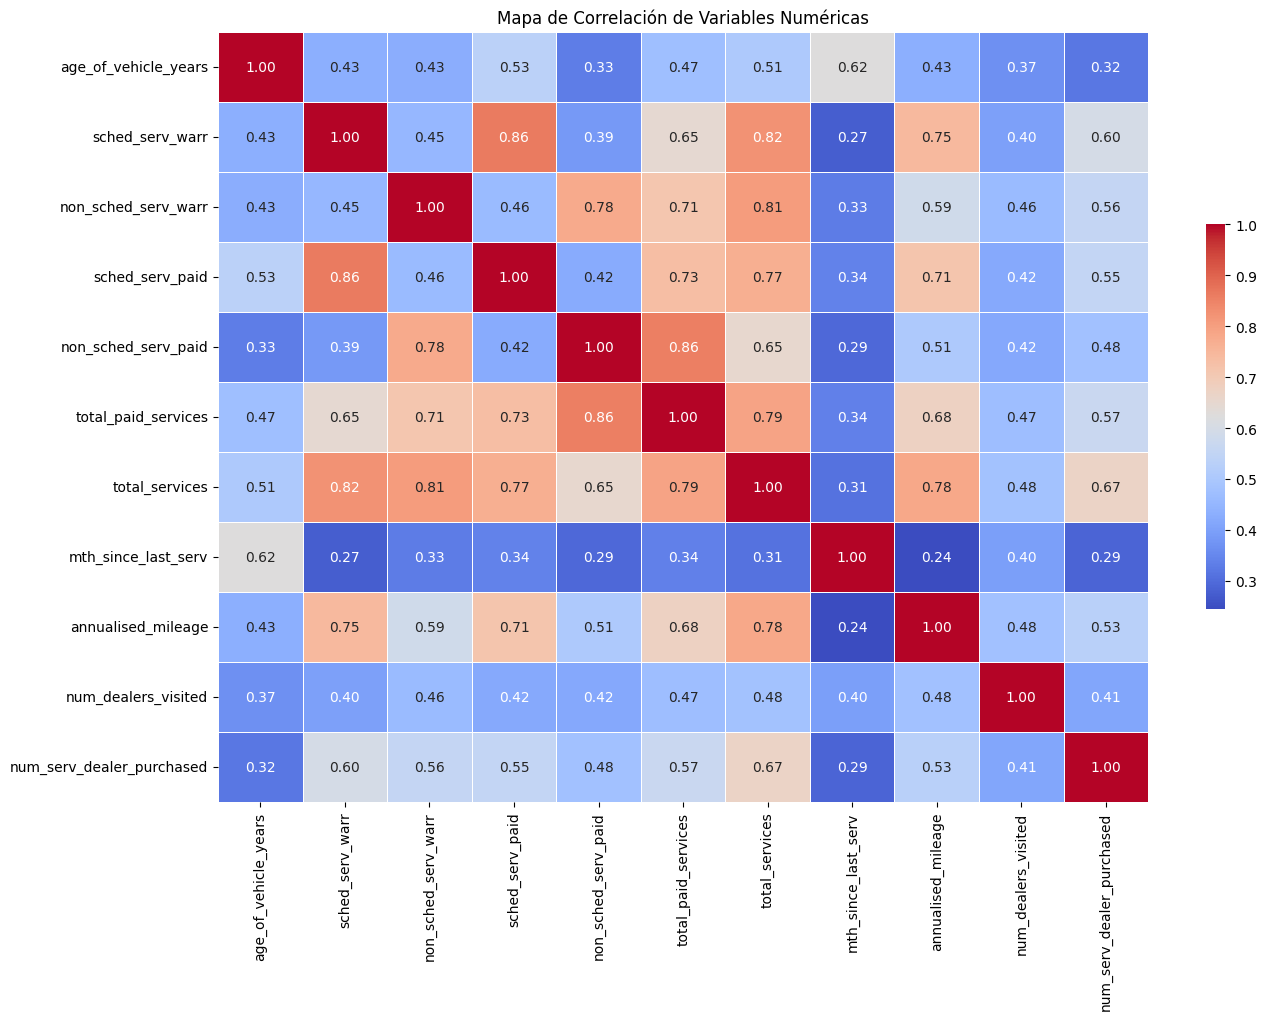

In [34]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop(['ID', 'Target'], axis=1)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

### 3. Explore Target variable

In [11]:
target = 'Target'

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

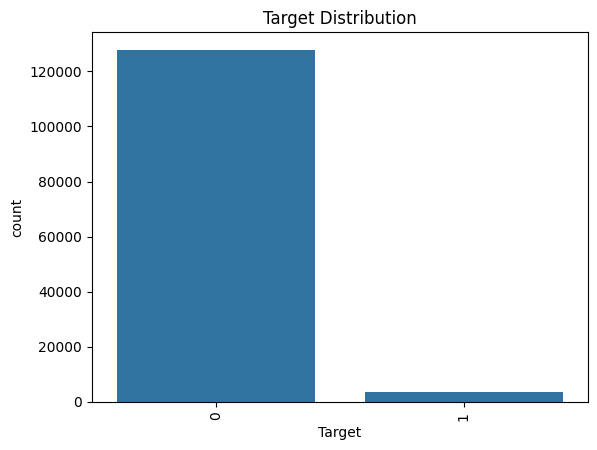

In [12]:
sns.countplot(data=df, x=target, order=df[target].value_counts().index)
plt.title(f'{target} Distribution')
plt.xticks(rotation=90)

imbalance target variable

### 4. Explore Variables of Interest

### 5. Prepare Data

In [15]:
def clean_and_preprocess_df(df_treated):
    df_processing = df_treated.copy()

    # Droping columns
    df_processing.drop(columns=['ID','age_band','gender'], inplace=True)

    #Feature scaling and transforming

    # Min Max Scaler
    # numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns.drop('Target')
    # scaler = MinMaxScaler()
    # df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])

    # One hot encoding
    dummies_df = pd.get_dummies(df_processing[['car_model',	'car_segment']], drop_first=True).astype(int)
    df_processing = pd.concat([df_processing, dummies_df], axis=1)
    df_processing.drop(['car_model',	'car_segment'], axis=1, inplace=True)

    return df_processing

In [16]:
clean_and_preprocess_df(df_total).head(1)

,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,car_model_model_10,car_model_model_11,car_model_model_12,car_model_model_13,car_model_model_14,car_model_model_15,car_model_model_16,car_model_model_17,car_model_model_18,car_model_model_19,car_model_model_2,car_model_model_3,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,9,2,10,3,7,5,6,9,8,10,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Split Dataset

In [17]:
df_model = clean_and_preprocess_df(df_total)

In [18]:
X = df_model.drop('Target', axis=1)
y = df_model['Target']

In [19]:
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42,stratify=y_model)

### 7. Baseline Model

In [20]:
train_mode = statistics.mode(y_train)

In [21]:
y_central_train = np.full(y_train.shape, train_mode)
y_central_val = np.full(y_val.shape, train_mode)
y_central_test = np.full(y_test.shape, train_mode)

In [22]:
accuracy_train_baseline = accuracy_score(y_train, y_central_train)
precision_train_baseline = precision_score(y_train, y_central_train, average='macro', zero_division=0)
recall_train_baseline = recall_score(y_train, y_central_train, average='macro')
f1_train_baseline = f1_score(y_train, y_central_train, average='macro')

accuracy_val_baseline = accuracy_score(y_val, y_central_val)
precision_val_baseline = precision_score(y_val, y_central_val, average='macro', zero_division=0)
recall_val_baseline = recall_score(y_val, y_central_val, average='macro')
f1_val_baseline = f1_score(y_val, y_central_val, average='macro')

accuracy_test_baseline = accuracy_score(y_test, y_central_test)
precision_test_baseline = precision_score(y_test, y_central_test, average='macro', zero_division=0)
recall_test_baseline = recall_score(y_test, y_central_test, average='macro')
f1_test_baseline = f1_score(y_test, y_central_test, average='macro')

In [23]:
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy_train_baseline, accuracy_val_baseline, accuracy_test_baseline],
    'Precision': [precision_train_baseline, precision_val_baseline, precision_test_baseline],
    'Recall': [recall_train_baseline, recall_val_baseline, recall_test_baseline],
    'F1 Score': [f1_train_baseline, f1_val_baseline, f1_test_baseline]
}, index=['Train Baseline', 'Validation Baseline', 'Test Baseline'])

In [24]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.5,0.493205
Validation Baseline,0.973208,0.486604,0.5,0.493211
Test Baseline,0.973199,0.486600,0.5,0.493209


### 8. Train Machine Learning Model

In [25]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [27]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='macro', zero_division=0)
recall_val = recall_score(y_val, y_pred_val, average='macro')
f1_val = f1_score(y_val, y_pred_val, average='macro')

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

In [28]:
new_results = pd.DataFrame({
    'Accuracy': [accuracy_train, accuracy_val, accuracy_test],
    'Precision': [precision_train, precision_val, precision_test],
    'Recall': [recall_train, recall_val, recall_test],
    'F1 Score': [f1_train, f1_val, f1_test]
}, index=['LR Train', 'LR Validation', 'LR Test'])

metrics_df = pd.concat([metrics_df, new_results])

In [29]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.500000,0.493205
Validation Baseline,0.973208,0.486604,0.500000,0.493211
Test Baseline,0.973199,0.486600,0.500000,0.493209
LR Train,0.977812,0.903435,0.608294,0.666820
LR Validation,0.977967,0.910690,0.608674,0.667881
LR Test,0.977882,0.895658,0.612913,0.671954


In [27]:
metrics_df

,Accuracy,Precision,Recall,F1 Score
Train Baseline,0.973184,0.486592,0.500000,0.493205
Validation Baseline,0.973208,0.486604,0.500000,0.493211
Test Baseline,0.973199,0.486600,0.500000,0.493209
LR Train,0.977610,0.906547,0.602366,0.659432
LR Validation,0.977539,0.912842,0.598090,0.654233
LR Test,0.977463,0.894861,0.603028,0.659428


Tunning Hyperparameters

In [ ]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(solver='liblinear')

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, verbose=1, scoring='accuracy')

grid_search.fit(X, y)

# Review the results
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print('Best parameters found: ', best_params)
print('Best cross-validated score (accuracy): ', best_score)

### 9. Assess Model Performance

In [28]:
model_train_perf =
model_valid_perf =
model_test_perf =

SyntaxError: invalid syntax (<ipython-input-28-68282c9e74ab>, line 1)